# Exploring Univariate Series

There are several standard ways to explore univariate timeseries in order to understand it's behaviour and identify suitable ways for forecasting that data

In [2]:
# Load some data
%run setup.py

In [3]:
train.head()

,pickup_date,total_rides,total_takings
0,2013-08-01,307272,4.567414e+06
1,2013-08-02,236761,3.534616e+06
2,2013-08-03,226554,3.182267e+06
3,2013-08-04,202310,3.073609e+06
4,2013-08-05,406487,6.657713e+06


In [4]:
# Pull out series of interest
Exploration_series = train['total_rides']]

In [10]:
Exploration_series.index = train['pickup_date']

## View

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

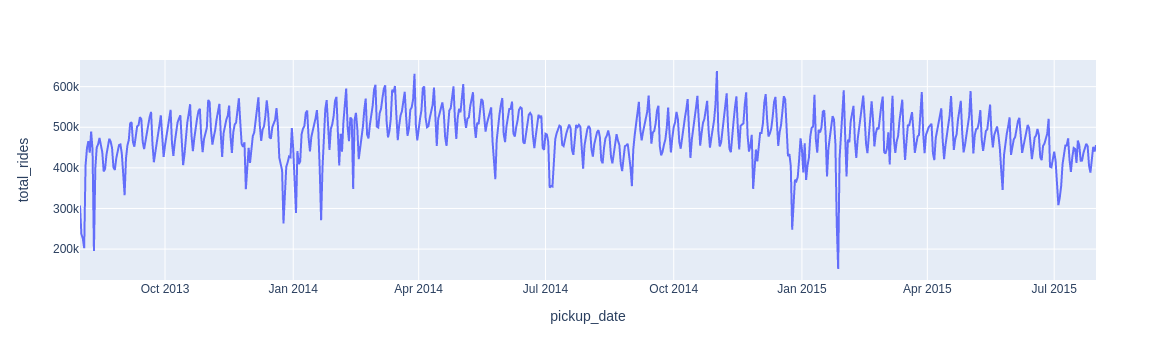

In [13]:
# Using plotly.express
import plotly.express as px

fig = px.line(Exploration_series, x='pickup_date', y="total_rides")
fig.show()

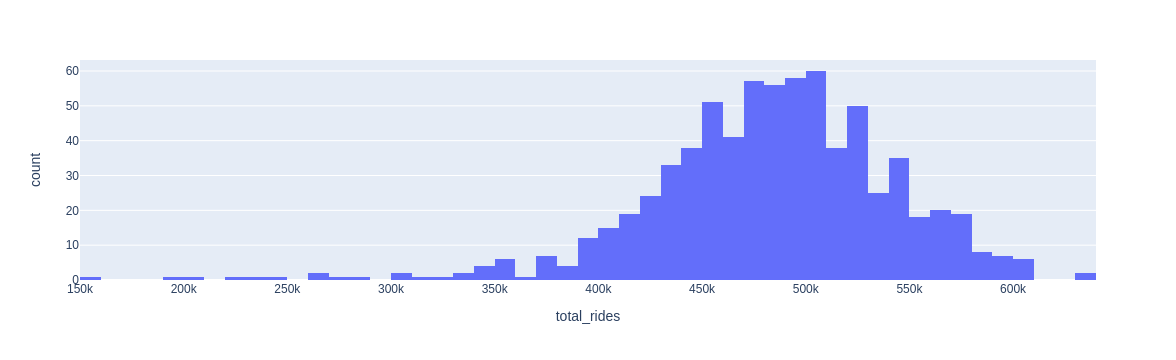

In [52]:
fig = px.histogram(Exploration_series, x="total_rides")
fig.show()

## Stationarity

In [40]:
def pretty_adfuller(ad_test):
    print("test statistic {0}".format(ad_test[0]))
    print("p-value {0}".format(ad_test[1]))
    print("num lags used in test {0}".format(ad_test[2]))
    print("critical values {0}".format(ad_test[3]))
    print("Maximised Information Criterion {0}".format(ad_test[4]))
    
    if ad_test[1] < 0.06:
        print()
        print("Reject the null hypothesis data is likely stationary")

In [5]:
from statsmodels.tsa.stattools import adfuller

In [42]:
pretty_adfuller(adfuller(train['total_rides']))

test statistic -3.6949370597328675
p-value 0.004184935159348303
num lags used in test 20
critical values 709
Maximised Information Criterion {'1%': -3.439606888036868, '5%': -2.865625121924057, '10%': -2.5689454046801052}

Reject the null hypothesis data is likely stationary


In [43]:
from statsmodels.tsa.stattools import kpss

In [45]:
def pretty_kpss(kpss_test):
    print("Test-Statistic: {0}".format(kpss_test[0]))
    print("p-value: {0}".format(kpss_test[1]))
    print("num lags used: {0}".format(kpss_test[2]))
    print("critical values: {0}".format(kpss_test[3]))
    
    if kpss_test[1] > 0.05:
        print()
        print("Failed to reject the null hypothesis that the data is stationary")

In [47]:
pretty_kpss(kpss(train['total_rides']))

Test-Statistic: 0.2958941776179325
p-value: 0.1
num lags used: 20
critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

Failed to reject the null hypothesis that the data is stationary


/home/jovyan/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




The ADF test with p-value < 0.05 and kpss > 0.05 suggest that we have a stationary process

## Autocorrelation